In [1]:
import pandas as pd
import scanpy as sc
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
path = '../'
peak_bed = f'{path}/3_ISM/m1d1_peaks.bed'
hits = pd.read_csv(f'{path}/3_ISM/fimo_out/fimo.tsv', index_col=0, sep='\t',comment='#') 
# output from running fimo(3_fimo.sh)
ad = sc.read_h5ad(f'{path}/0_preprocess/test_data/human/m1d1/ad.h5ad')

In [8]:
import re
pattern = r'\((.*?)\)_\(.*?\)_\(.*?\)'
motif_name = [re.sub(pattern, r'\1', item) for item in hits0['motif_alt_id'].values]
print(motif_name[0:3])
hits['motif_name'] = motif_name
hits['motif_id'] = hits.index
hits['hit_id'] = hits['motif_name'].str.cat(hits['start'].astype(int).astype(str), sep='_')
hits.index = hits['hit_id']

['ZNF496', 'ZNF235', 'ZNF287']


In [9]:
a = np.load(f'./peak0_ism.npy')
a_norm = a - np.repeat(a.mean(axis=2)[:,:,np.newaxis], 4, axis=2)

In [10]:
motif = 'MEF2C_567'
motif_name = motif.split('_')[0]
pwm = pd.read_csv(f'./motif_pwms/motif_files/{motif_name}.csv', index_col=0) 
start_site = int(hits.loc[motif, 'start']-1)
ism_matrix = a_norm[:,start_site:(start_site+pwm.shape[1]),:] 
ad.obs[motif] = [np.dot(pwm.transpose().values.flatten(), i.flatten()) for i in ism_matrix]

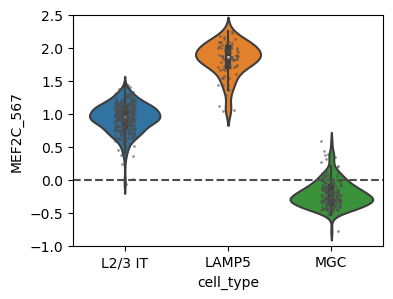

In [11]:
cts = ['L2/3 IT','LAMP5','MGC']
f, axs = plt.subplots(ncols=1, figsize=(4,3))
sns.violinplot(x='cell_type', y = motif, data=ad.obs, order=cts)
sns.stripplot(x='cell_type', y=motif, data=ad.obs, order=cts, alpha=0.6, color='0.3', size=2)
axs.set_ylim(-1,2.5)
axs.axhline(y=0, linestyle='dashed', color='0.3')
# f.savefig(f'./corr_{motif}.pdf', bbox_inches='tight', dpi=300)

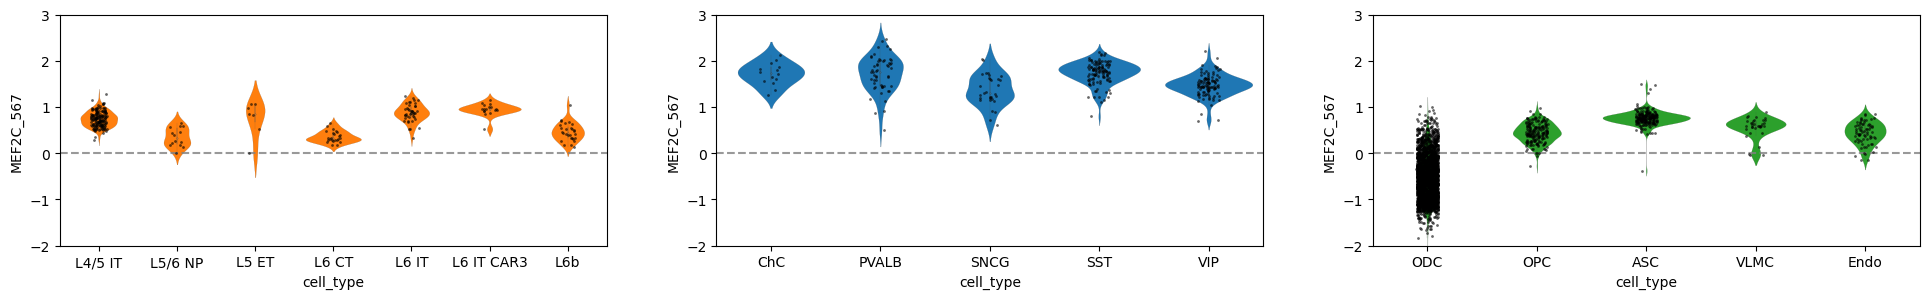

In [12]:
cts = ['L4/5 IT','L5/6 NP','L5 ET','L6 CT','L6 IT','L6 IT CAR3','L6b', 'ChC','PVALB','SNCG',
       'SST','VIP','ODC','OPC','ASC','VLMC','Endo']
colors = ['#ff7f0e','#1f77b4', '#2ca02c'] 
f, axs = plt.subplots(ncols=3, figsize=(24,3))
sns.violinplot(x='cell_type', y=motif, data=ad.obs, order=cts[:7], 
               linewidth=0.1, color=colors[0],saturation=1,ax=axs[0]) 
sns.stripplot(x='cell_type', y=motif, data=ad.obs, order=cts[:7], 
              alpha=0.6, color='0', size=2, ax=axs[0])
sns.violinplot(x='cell_type', y=motif, data=ad.obs, order=cts[7:12], 
            linewidth=0.1,color=colors[1],saturation=1,ax=axs[1]) 
sns.stripplot(x='cell_type', y=motif, data=ad.obs, order=cts[7:12], 
              alpha=0.6, color='0', size=2, ax=axs[1])
sns.violinplot(x='cell_type', y=motif, data=ad.obs, order=cts[12:], 
              linewidth=0.1,color=colors[2],saturation=1,ax=axs[2]) 
sns.stripplot(x='cell_type', y=motif, data=ad.obs, order=cts[12:], 
              alpha=0.6, color='0', size=2, ax=axs[2])
for ax in axs:
    ax.set_ylim(-2, 3)
    ax.axhline(y=0, linestyle='dashed', color='0.5', alpha=0.8)
# f.savefig('./corr_{motif}_allcelltype.pdf', bbox_inches='tight', dpi=300)